In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import rdChemReactions
import os
import selfies as sf
from IPython.display import display_png
from rdkit.Chem.Draw import IPythonConsole
import re

In [102]:
class CompVal():
    
    def __init__(self, selfie):
        IPythonConsole.ipython_useSVG = True
        self.selfie = selfie
        self.smiles = sf.decoder(self.selfie)
        self.mol = rdkit.Chem.MolFromSmiles(self.smiles)
        self.HBA = Descriptors.NumHAcceptors(self.mol) 
        self.HBD = Descriptors.NumHDonors(self.mol)
        self.ClogP = Descriptors.MolLogP(self.mol)
        self.MW = Descriptors.MolWt(self.mol)
        self.is_drug_like = None
    
    def draw_mol(self):
        img = Chem.Draw.MolToImage(self.mol)
        display_png(img)
        
    def validate(self):
        self.is_drug_like = (self.HBA) <= 10 & (self.HBD <= 5) & (self.ClogP >= 0 ) & (self.ClogP <= 5) & (self.MW <= 500)
        
    def remove_pentyl(self):
        pattern = Chem.MolFromSmarts('[CH2]-[CH2]-[CH2]-[CH2]-[CH3]')
        replacement = Chem.MolFromSmarts('[CH3]')
        mol = Chem.ReplaceSubstructs(self.mol, pattern, replacement)[0]
        mol = Chem.AddHs(mol)
        mol = Chem.RemoveHs(mol)
        self.mol = mol
        self.smiles = Chem.MolToSmiles(self.mol)
        self.selfie = sf.encoder(self.smiles)
        
    def remove_allene_mol(self): 
        """
        Method for removing allene parts using mol objects
        """
        pattern = Chem.MolFromSmarts('[CH]=[CH]=[CH]=[CH2]')
        replacement = Chem.MolFromSmarts('[CH3]')
        mol = Chem.ReplaceSubstructs(self.mol, pattern, replacement)[0]
        mol = Chem.AddHs(mol)
        mol = Chem.RemoveHs(mol)
        self.mol = mol
        self.smiles = Chem.MolToSmiles(self.mol)
        self.selfie = sf.encoder(self.smiles)
    
    def remove_cps_mol(self):
        """
        Method for removing unsaturated tricyclic carbon rings
        """
        patterns = [Chem.MolFromSmarts('[!R]~[C]1=[CH]~[C]1'), Chem.MolFromSmarts('[!R]~[C]1#[C]~[C]1'),
                   Chem.MolFromSmarts('[!R]~[C]1~[C]=[C]1'), Chem.MolFromSmarts('[!R]~[C]1~[C]#[C]1')]
        replacement = Chem.MolFromSmarts('[CH3]')
        for pattern in patterns:
            try:
                mol = Chem.ReplaceSubstructs(self.mol, pattern, replacement)[0]
                mol = Chem.AddHs(mol)
                mol = Chem.RemoveHs(mol)
                self.mol = mol
                self.smiles = Chem.MolToSmiles(self.mol)
                self.selfie = sf.encoder(self.smiles) 
            except:
                print('Doesn"t work')      
    
    def remove_alkane_reg(self):
        """
        Method for removing long carbon chains (>3 -CH2-) using RegEx on selfies
        """
        reg = r'(\[C\]\[C\])(?:\[C\]){4,8}(\[C\])'
        new_selfie = re.sub(reg, r'\1\2', self.selfie)
        if new_selfie == self.selfie:
            pass
        else:
            self.selfie = new_selfie
            self.smiles = sf.decoder(self.selfie)
            self.mol = Chem.MolFromSmiles(self.smiles)
        
    def remove_allene_reg(self):
        """
        Method for removing allene groups (~CH=CH=CH~) using RegEx on selfies
        """
        reg = r'(.)(?:\[=C\]){,5}(\[=C\])'
        new_selfie = re.sub(reg, r'\1\2', self.selfie)
        if new_selfie == self.selfie:
            print("Pattern not found")
        else:
            self.selfie = new_selfie
            self.smiles = sf.decoder(self.selfie)
            self.mol = Chem.MolFromSmiles(self.smiles)
        
    def make_benzen(self):
        pass
        #reaction_smarts = 
        

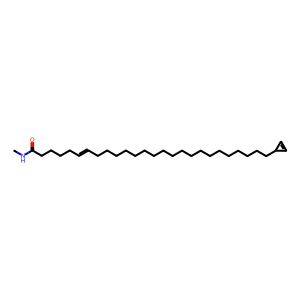

Pattern not found


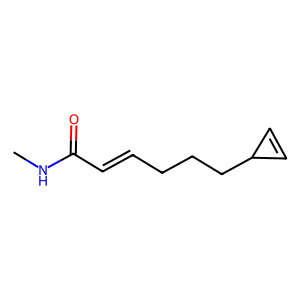

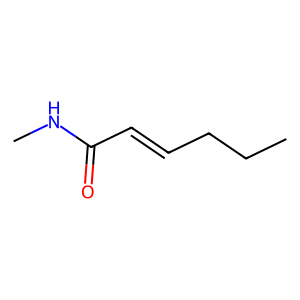

In [103]:
selfie = "[O][=C][Branch1][Ring1][N][C][C][C][C][C][C][C][Ring1][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][Ring1][Ring1][Ring1]"

comp_val = CompVal(selfie)
comp_val.draw_mol()
comp_val.remove_alkane_reg()
comp_val.remove_allene_reg()
comp_val.draw_mol()
comp_val.remove_cps_mol()
comp_val.draw_mol()